In [1]:
import os
import cv2


# 基础文件夹路径
base_folder_path = 'Real_Life_Violence_Dataset'

# 用于保存帧的文件夹路径
non_violence_frames_folder_path = os.path.join(base_folder_path, 'NonViolence-frame')
violence_frames_folder_path = os.path.join(base_folder_path, 'Violence-frame')

# 创建用于保存帧的文件夹
try:
    if not os.path.exists(non_violence_frames_folder_path):
        os.makedirs(non_violence_frames_folder_path)
        print(f"Created folder: {non_violence_frames_folder_path}")
    else:
         print(f"Folder already exists: {non_violence_frames_folder_path}")  
    if not os.path.exists(violence_frames_folder_path):
        os.makedirs(violence_frames_folder_path)
        print(f"Created folder: {violence_frames_folder_path}")
    else:
        print(f"Folder already exists: {violence_frames_folder_path}")
except Exception as e:
    print(f"Error creating folders: {e}")


Created folder: Real_Life_Violence_Dataset\NonViolence-frame
Created folder: Real_Life_Violence_Dataset\Violence-frame


In [2]:
def extract_and_save_frames(video_path, output_folder, frame_rate=1, frame_size=(224, 224)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    saved_frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % frame_rate == 0:
            frame = cv2.resize(frame, frame_size)
            frame_filename = os.path.join(output_folder, f'frame_{saved_frame_count:04d}.jpg')
            cv2.imwrite(frame_filename, frame)
            saved_frame_count += 1
        frame_count += 1

    cap.release()
    print(f'Extracted {saved_frame_count} frames from {video_path}')

In [4]:
#获取视频文件夹路径
base_folder_path = 'Real_Life_Violence_Dataset'
non_violence_folder_path = os.path.join(base_folder_path, 'NonViolence')
violence_folder_path = os.path.join(base_folder_path, 'Violence')
#创建用于保存帧的文件夹路径
non_violence_frames_folder_path = os.path.join(base_folder_path, 'NonViolence-frame')
violence_frames_folder_path = os.path.join(base_folder_path, 'Violence-frame')
#获取视频路径
non_violence_video_paths = [os.path.join(non_violence_folder_path, f) for f in os.listdir(non_violence_folder_path) if f.endswith('.mp4')]
violence_video_paths = [os.path.join(violence_folder_path, f) for f in os.listdir(violence_folder_path) if f.endswith('.mp4')]
#提取并保存帧
for video_path in non_violence_video_paths:
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    output_folder = os.path.join(non_violence_frames_folder_path, video_name)
    extract_and_save_frames(video_path, output_folder)

for video_path in violence_video_paths:
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    output_folder = os.path.join(violence_frames_folder_path, video_name)
    extract_and_save_frames(video_path, output_folder)


Extracted 66 frames from Real_Life_Violence_Dataset\NonViolence\NV_1.mp4
Extracted 150 frames from Real_Life_Violence_Dataset\NonViolence\NV_10.mp4
Extracted 150 frames from Real_Life_Violence_Dataset\NonViolence\NV_100.mp4
Extracted 104 frames from Real_Life_Violence_Dataset\NonViolence\NV_1000.mp4
Extracted 150 frames from Real_Life_Violence_Dataset\NonViolence\NV_101.mp4
Extracted 150 frames from Real_Life_Violence_Dataset\NonViolence\NV_102.mp4
Extracted 125 frames from Real_Life_Violence_Dataset\NonViolence\NV_103.mp4
Extracted 150 frames from Real_Life_Violence_Dataset\NonViolence\NV_104.mp4
Extracted 125 frames from Real_Life_Violence_Dataset\NonViolence\NV_105.mp4
Extracted 125 frames from Real_Life_Violence_Dataset\NonViolence\NV_106.mp4
Extracted 125 frames from Real_Life_Violence_Dataset\NonViolence\NV_107.mp4
Extracted 150 frames from Real_Life_Violence_Dataset\NonViolence\NV_108.mp4
Extracted 150 frames from Real_Life_Violence_Dataset\NonViolence\NV_109.mp4
Extracted 138 f

In [14]:
import os
import cv2

def extract_frames_per_second(video_path, output_folder, frame_size=(224, 224)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))  # 获取视频的帧率
    frame_count = 0
    saved_frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % fps == 0:  # 每秒抽取一帧
            frame = cv2.resize(frame, frame_size)
            frame_filename = os.path.join(output_folder, f'{os.path.splitext(os.path.basename(video_path))[0]}_frame_{saved_frame_count:04d}.jpg')
            cv2.imwrite(frame_filename, frame)
            saved_frame_count += 1
        frame_count += 1

    cap.release()
    return saved_frame_count

# Base folder paths
base_folder_path = 'Real_Life_Violence_Dataset'
violence_folder_path = os.path.join(base_folder_path, 'Violence')
violence_frames_folder_path = os.path.join(base_folder_path, 'Violence-frame')

# Get video paths (limiting to 1000 videos)
violence_video_paths = [os.path.join(violence_folder_path, f) for f in os.listdir(violence_folder_path) if f.endswith('.mp4')][:1000]

total_frames_extracted = 0

# Extract and save frames
for video_path in violence_video_paths:
    frames_extracted = extract_frames_per_second(video_path, violence_frames_folder_path)
    total_frames_extracted += frames_extracted

print(f'Total frames extracted: {total_frames_extracted}')


Total frames extracted: 5587


In [15]:
import os
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image
import torch
import numpy as np

# 初始化ViT模型和特征提取器
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTModel.from_pretrained('google/vit-base-patch16-224')

def extract_vit_features(image_path):
    image = Image.open(image_path).convert('RGB')
    inputs = feature_extractor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# 文件夹路径
violence_frames_folder_path = os.path.join('Real_Life_Violence_Dataset', 'Violence-frame')

# 获取所有帧图像路径
frame_paths = [os.path.join(violence_frames_folder_path, f) for f in os.listdir(violence_frames_folder_path) if f.endswith('.jpg')]

# 提取特征
features = []
for frame_path in frame_paths:
    feature = extract_vit_features(frame_path)
    features.append(feature)

features = np.array(features)
print(f'Extracted features from {len(features)} frames.')


Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Extracted features from 5587 frames.


In [18]:
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter

# 假设 features 是从之前步骤中提取的帧特征
# features = np.array([...])  # 已提取的特征数组

# 使用 K-Means 进行聚类
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# 获取聚类结果
labels = kmeans.labels_

# 打印每个视频对应的聚类标签
for i, label in enumerate(labels):
    print(f'Frame {i}: Cluster {label}')

    # 计算每一类的个数
label_counts = Counter(labels)

# 打印每一类的个数
for label, count in label_counts.items():
    print(f'Cluster {label}: {count} frames')




c:\ProgramData\anaconda3\envs\comp9517\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Frame 0: Cluster 2
Frame 1: Cluster 2
Frame 2: Cluster 2
Frame 3: Cluster 2
Frame 4: Cluster 2
Frame 5: Cluster 2
Frame 6: Cluster 0
Frame 7: Cluster 0
Frame 8: Cluster 0
Frame 9: Cluster 0
Frame 10: Cluster 2
Frame 11: Cluster 2
Frame 12: Cluster 0
Frame 13: Cluster 0
Frame 14: Cluster 2
Frame 15: Cluster 2
Frame 16: Cluster 2
Frame 17: Cluster 2
Frame 18: Cluster 2
Frame 19: Cluster 2
Frame 20: Cluster 2
Frame 21: Cluster 2
Frame 22: Cluster 2
Frame 23: Cluster 2
Frame 24: Cluster 2
Frame 25: Cluster 2
Frame 26: Cluster 2
Frame 27: Cluster 2
Frame 28: Cluster 2
Frame 29: Cluster 2
Frame 30: Cluster 2
Frame 31: Cluster 2
Frame 32: Cluster 2
Frame 33: Cluster 2
Frame 34: Cluster 2
Frame 35: Cluster 2
Frame 36: Cluster 2
Frame 37: Cluster 2
Frame 38: Cluster 2
Frame 39: Cluster 2
Frame 40: Cluster 2
Frame 41: Cluster 2
Frame 42: Cluster 2
Frame 43: Cluster 2
Frame 44: Cluster 2
Frame 45: Cluster 2
Frame 46: Cluster 2
Frame 47: Cluster 2
Frame 48: Cluster 2
Frame 49: Cluster 2
Frame 50: 

c:\ProgramData\anaconda3\envs\comp9517\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\ProgramData\anaconda3\envs\comp9517\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: 749 videos
Videos: ['V_1.mp4', 'V_10.mp4', 'V_100.mp4', 'V_1000.mp4', 'V_101.mp4', 'V_102.mp4', 'V_103.mp4', 'V_104.mp4', 'V_105.mp4', 'V_106.mp4', 'V_107.mp4', 'V_108.mp4', 'V_109.mp4', 'V_11.mp4', 'V_110.mp4', 'V_111.mp4', 'V_112.mp4', 'V_113.mp4', 'V_114.mp4', 'V_115.mp4', 'V_116.mp4', 'V_117.mp4', 'V_118.mp4', 'V_119.mp4', 'V_12.mp4', 'V_120.mp4', 'V_121.mp4', 'V_122.mp4', 'V_123.mp4', 'V_124.mp4', 'V_125.mp4', 'V_126.mp4', 'V_127.mp4', 'V_128.mp4', 'V_129.mp4', 'V_13.mp4', 'V_130.mp4', 'V_131.mp4', 'V_132.mp4', 'V_133.mp4', 'V_134.mp4', 'V_135.mp4', 'V_136.mp4', 'V_137.mp4', 'V_138.mp4', 'V_139.mp4', 'V_14.mp4', 'V_140.mp4', 'V_141.mp4', 'V_142.mp4', 'V_143.mp4', 'V_144.mp4', 'V_145.mp4', 'V_146.mp4', 'V_147.mp4', 'V_148.mp4', 'V_149.mp4', 'V_15.mp4', 'V_150.mp4', 'V_151.mp4', 'V_152.mp4', 'V_153.mp4', 'V_154.mp4', 'V_155.mp4', 'V_156.mp4', 'V_157.mp4', 'V_158.mp4', 'V_159.mp4', 'V_16.mp4', 'V_160.mp4', 'V_161.mp4', 'V_162.mp4', 'V_163.mp4', 'V_164.mp4', 'V_165.mp4', 'V

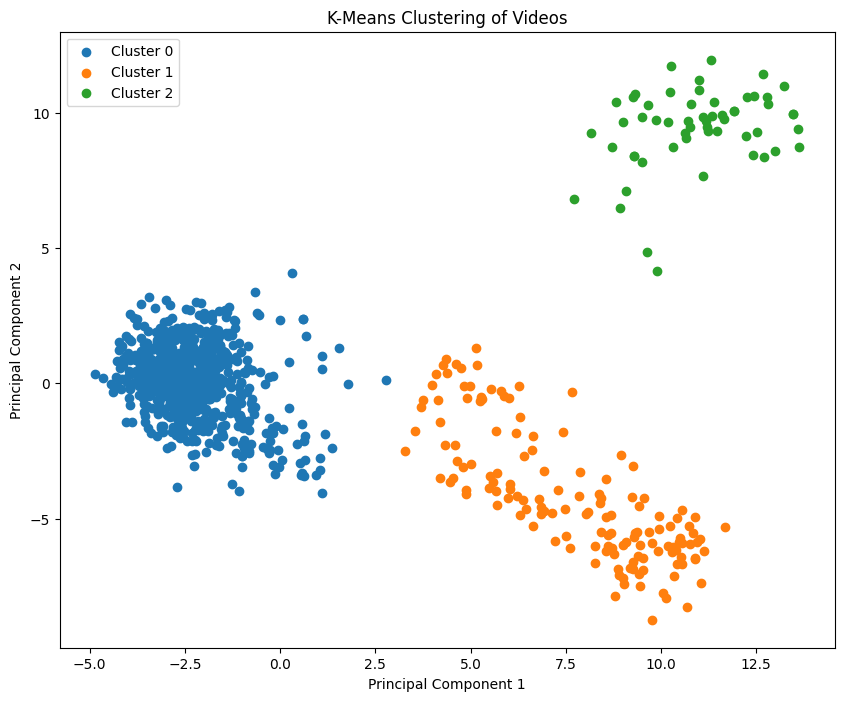

In [38]:
import os
import cv2
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image
import torch
import matplotlib.pyplot as plt

# 初始化ViT模型和特征提取器
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTModel.from_pretrained('google/vit-base-patch16-224')

def extract_vit_features(image):
    inputs = feature_extractor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

def extract_video_features(video_path, frame_size=(224, 224)):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = 0
    features = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % fps == 0:
            frame = cv2.resize(frame, frame_size)
            image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            features.append(extract_vit_features(image))
        frame_count += 1

    cap.release()
    
    if features:
        return np.mean(features, axis=0)  # 平均特征
    else:
        return None  

# 文件夹路径
base_folder_path = 'Real_Life_Violence_Dataset'
violence_folder_path = os.path.join(base_folder_path, 'Violence')

# 获取视频路径（限制为1000个视频）
violence_video_paths = [os.path.join(violence_folder_path, f) for f in os.listdir(violence_folder_path) if f.endswith('.mp4')][:1000]

# 提取视频特征
video_features = []
skipped_videos = []

for video_path in violence_video_paths:
    features = extract_video_features(video_path)
    if features is not None:
        video_features.append(features)
    else:
        skipped_videos.append(os.path.basename(video_path))

video_features = np.array(video_features)

# 使用 K-Means 进行聚类
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(video_features)

# 获取聚类结果
labels = kmeans.labels_

# 输出每类包含的视频数目和视频名称
for cluster in range(num_clusters):
    videos_in_cluster = [os.path.basename(violence_video_paths[i]) for i in range(len(labels)) if labels[i] == cluster]
    print(f'Cluster {cluster}: {len(videos_in_cluster)} videos')
    print('Videos:', videos_in_cluster)

# 打印被跳过的视频并划分到 Cluster 3
print(f'Skipped {len(skipped_videos)} videos, assigned to Cluster 3:')
print('Skipped Videos:', skipped_videos)

# 使用 PCA 降维到 2D 并可视化
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(video_features)

plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    points = reduced_features[labels == cluster]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster}')
plt.title('K-Means Clustering of Videos')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [51]:
# 定义缺少的视频列表
missing_videos = [
    'V_3.mp4', 'V_4.mp4', 'V_5.mp4', 'V_6.mp4', 'V_7.mp4', 'V_8.mp4', 'V_9.mp4', 
    'V_23.mp4', 'V_26.mp4', 'V_27.mp4', 'V_28.mp4', 'V_30.mp4', 'V_31.mp4', 
    'V_32.mp4', 'V_33.mp4', 'V_34.mp4', 'V_35.mp4', 'V_36.mp4', 'V_37.mp4', 
    'V_38.mp4', 'V_39.mp4', 'V_40.mp4', 'V_41.mp4', 'V_42.mp4', 'V_43.mp4', 
    'V_44.mp4', 'V_45.mp4', 'V_46.mp4', 'V_47.mp4', 'V_48.mp4', 'V_49.mp4', 
    'V_50.mp4', 'V_51.mp4', 'V_52.mp4', 'V_53.mp4', 'V_54.mp4', 'V_55.mp4', 
    'V_56.mp4', 'V_57.mp4', 'V_58.mp4', 'V_59.mp4', 'V_60.mp4', 'V_61.mp4', 
    'V_62.mp4', 'V_63.mp4', 'V_64.mp4', 'V_65.mp4', 'V_66.mp4'
]

# 将缺少的视频归入 Cluster 3 的函数
def add_videos_to_cluster(videos, cluster_number):
    cluster = {}  # 模拟已有的 cluster 字典
    if cluster_number not in cluster:
        cluster[cluster_number] = []
    cluster[cluster_number].extend(videos)
    return cluster

# 调用函数
cluster_3 = add_videos_to_cluster(missing_videos, 3)

# 输出 Cluster 3 的格式
cluster_number = 3
video_count = len(cluster_3[cluster_number])
output = f"Cluster {cluster_number}: {video_count} videos\nVideos: {cluster_3[cluster_number]}"
print(output)


Cluster 3: 48 videos
Videos: ['V_3.mp4', 'V_4.mp4', 'V_5.mp4', 'V_6.mp4', 'V_7.mp4', 'V_8.mp4', 'V_9.mp4', 'V_23.mp4', 'V_26.mp4', 'V_27.mp4', 'V_28.mp4', 'V_30.mp4', 'V_31.mp4', 'V_32.mp4', 'V_33.mp4', 'V_34.mp4', 'V_35.mp4', 'V_36.mp4', 'V_37.mp4', 'V_38.mp4', 'V_39.mp4', 'V_40.mp4', 'V_41.mp4', 'V_42.mp4', 'V_43.mp4', 'V_44.mp4', 'V_45.mp4', 'V_46.mp4', 'V_47.mp4', 'V_48.mp4', 'V_49.mp4', 'V_50.mp4', 'V_51.mp4', 'V_52.mp4', 'V_53.mp4', 'V_54.mp4', 'V_55.mp4', 'V_56.mp4', 'V_57.mp4', 'V_58.mp4', 'V_59.mp4', 'V_60.mp4', 'V_61.mp4', 'V_62.mp4', 'V_63.mp4', 'V_64.mp4', 'V_65.mp4', 'V_66.mp4']


In [54]:
import os
import random
import cv2
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image
import torch
import numpy as np

# 初始化ViT模型和特征提取器
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTModel.from_pretrained('google/vit-base-patch16-224')

def extract_vit_features(image):
    inputs = feature_extractor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

def extract_random_frame(video_path, frame_size=(224, 224)):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps
    
    if duration > 1:
        random_second = random.randint(0, int(duration) - 1)
        cap.set(cv2.CAP_PROP_POS_FRAMES, random_second * fps)
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ret, frame = cap.read()
    cap.release()
    
    if ret:
        frame = cv2.resize(frame, frame_size)
        image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        return extract_vit_features(image)
    else:
        return None

# 文件夹路径
base_folder_path = 'Real_Life_Violence_Dataset'
non_violence_folder_path = os.path.join(base_folder_path, 'NonViolence')

# 获取视频路径（限制为1000个视频）
non_violence_video_paths = [os.path.join(non_violence_folder_path, f) for f in os.listdir(non_violence_folder_path) if f.endswith('.mp4')][:1000]

# 提取视频特征
video_features = []
video_names = []

for video_path in non_violence_video_paths:
    features = extract_random_frame(video_path)
    if features is not None:
        video_features.append(features)
        video_names.append(os.path.basename(video_path))

video_features = np.array(video_features)

print(f'Extracted features from {len(video_features)} videos.')

# 保存特征和视频名称（可选）
np.save('non_violence_video_features.npy', video_features)
np.save('non_violence_video_names.npy', video_names)


c:\ProgramData\anaconda3\envs\comp9517\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Extracted features from 701 videos.


In [56]:
import os
import random
import cv2

def extract_random_frame(video_path, output_folder, frame_size=(224, 224)):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps
    
    if duration > 1:
        random_second = random.randint(0, int(duration) - 1)
        cap.set(cv2.CAP_PROP_POS_FRAMES, random_second * fps)
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    ret, frame = cap.read()
    cap.release()
    
    if ret:
        frame = cv2.resize(frame, frame_size)
        video_name = os.path.splitext(os.path.basename(video_path))[0]
        output_path = os.path.join(output_folder, f'{video_name}.jpg')
        cv2.imwrite(output_path, frame)
        return output_path
    else:
        return None

# 文件夹路径
base_folder_path = 'Real_Life_Violence_Dataset'
violence_folder_path = os.path.join(base_folder_path, 'Violence')
non_violence_folder_path = os.path.join(base_folder_path, 'NonViolence')

# 输出文件夹路径
output_folder = os.path.join(base_folder_path, 'ExtractedFrames')
os.makedirs(output_folder, exist_ok=True)

# 获取视频路径（限制为各1000个视频，共2000个）
violence_video_paths = [os.path.join(violence_folder_path, f) for f in os.listdir(violence_folder_path) if f.endswith('.mp4')][:1000]
non_violence_video_paths = [os.path.join(non_violence_folder_path, f) for f in os.listdir(non_violence_folder_path) if f.endswith('.mp4')][:1000]

# 提取帧并保存为图像
extracted_images = []
for video_path in violence_video_paths + non_violence_video_paths:
    output_path = extract_random_frame(video_path, output_folder)
    if output_path:
        extracted_images.append(output_path)

print(f'Extracted {len(extracted_images)} frames.')


Extracted 1645 frames.


In [57]:
import shutil
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
train_images, test_images = train_test_split(extracted_images, test_size=0.3, random_state=42)

# 创建训练集和测试集文件夹
train_folder = os.path.join(base_folder_path, 'TrainFrames')
test_folder = os.path.join(base_folder_path, 'TestFrames')
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# 复制图像到训练集和测试集文件夹
for img_path in train_images:
    shutil.copy(img_path, train_folder)
for img_path in test_images:
    shutil.copy(img_path, test_folder)

print(f'Saved {len(train_images)} images to training set.')
print(f'Saved {len(test_images)} images to testing set.')


Saved 1151 images to training set.
Saved 494 images to testing set.


In [59]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 数据生成器
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Real_Life_Violence_Dataset/TrainFrames',  # 替换为训练集文件夹路径
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'Real_Life_Violence_Dataset/TestFrames',  # 替换为测试集文件夹路径
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# 构建CNN模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(train_generator, epochs=10, validation_data=test_generator)

# 评估模型
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy}')



Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


ValueError: Asked to retrieve element 0, but the Sequence has length 0